In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:

file="https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
df=pd.read_csv(file)

In [ ]:
df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no


In [ ]:
#separating into features and target
features=df[['failures','health','age','studytime']]
target=df['passed']

X=features.values
y=target.values

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = pd.Series(y_train).map({'yes': 1, 'no': 0})
y_test = pd.Series(y_test).map({'yes': 1, 'no': 0})

In [ ]:
scaler = StandardScaler() #normalizing standard dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
class MultiClassClassifier(nn.Module):
    def __init__(self):
        super(MultiClassClassifier, self).__init__()

        self.linear1 = nn.Linear(4, 10)
        self.linear2 = nn.Linear(10, 6)
        self.linear3 = nn.Linear(6, 2)

    def forward(self, x):

        x1 = torch.relu(self.linear1(x))  # to convert negative values into 0 for accuracy
        x2 = torch.relu(self.linear2(x1))
        x3 = self.linear3(x2)
        return x3




In [ ]:
model = MultiClassClassifier()
loss = nn.CrossEntropyLoss()
criteria = torch.optim.SGD(model.parameters(), lr = 0.05)
num_epochs=100

In [ ]:
train_loss=[]
test_loss=[]

In [ ]:
for ep in range(num_epochs):
  model.train()
  predicted_y = model(X_train)
  losses = loss(predicted_y, y_train)

  criteria.zero_grad()
  losses.backward()
  criteria.step()
  print(losses.item())

  train_loss.append(losses.item())
  model.eval()
  with torch.no_grad():
    predicted_test_y=model(X_test)
    loss_test=loss(predicted_test_y,y_test)
    test_loss.append(loss_test.item())

0.6668533086776733
0.6647421717643738
0.6627376675605774
0.660828709602356
0.6590193510055542
0.6573014855384827
0.6556740403175354
0.6541265845298767
0.6526413559913635
0.6512264609336853
0.649878203868866
0.6485989689826965
0.6473895907402039
0.6462361216545105
0.6451357007026672
0.6440850496292114
0.6430825591087341
0.6421309113502502
0.6412240266799927
0.6403558254241943
0.6395145058631897
0.6387082934379578
0.6379256248474121
0.637161135673523
0.6364315152168274
0.635731041431427
0.6350252628326416
0.6343346834182739
0.6336398720741272
0.6329721212387085
0.6323228478431702
0.6316814422607422
0.631064772605896
0.6304681301116943
0.6298922300338745
0.6293318271636963
0.628790020942688
0.6282749772071838
0.6277737021446228
0.6272771954536438
0.626761794090271
0.6262566447257996
0.625737726688385
0.6252288818359375
0.6247300505638123
0.6242223978042603
0.6236864328384399
0.6231337189674377
0.6225935816764832
0.6220613121986389
0.6215386390686035
0.6210230588912964
0.620513916015625
0.

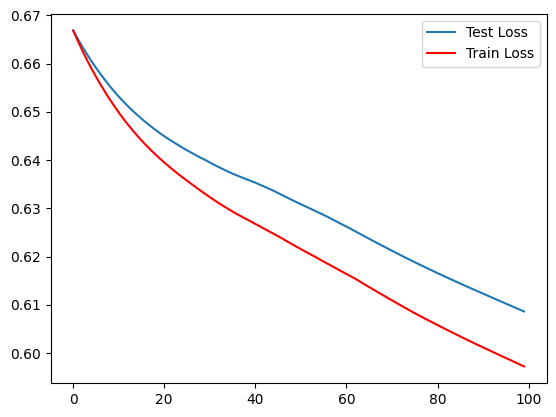

In [ ]:
plt.plot(test_loss, label = 'Test Loss')
plt.plot(train_loss, color='red', label = 'Train Loss')
plt.legend()
plt.show()

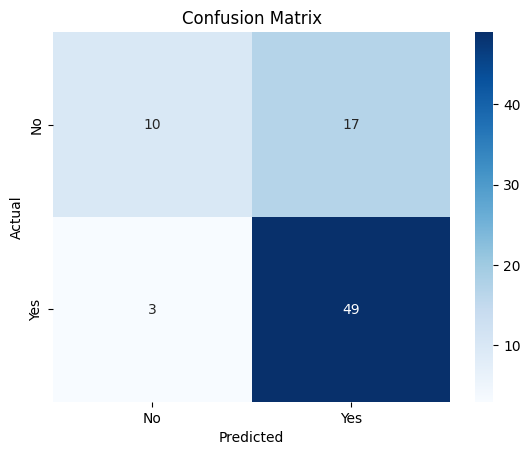

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply sigmoid, round for binary classes, and convert to NumPy
predicted_test_classes = torch.sigmoid(predicted_test_y).round().int().numpy()
y_test_np = y_test.numpy()  # Convert y_test to NumPy

# Calculate confusion matrix


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
with torch.no_grad():
  outputs=model(X_test)
  _, predicted_classes=torch.max(outputs.data,1)

accuracy=(predicted_classes==y_test).sum().item()/y_test.size(0)
print(accuracy)

0.6582278481012658
